# Lesson 7 - Parkinson PCR

## Author - Lawrence Huang

### Description:

Perform Principal Component Regression on a <a href="https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring">dataset that tracked patients with Parkinson's Disease</a>.

Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

About the data:
This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

#### Instructions:

 1. Load the dataset.
 2. Create the X-matrix (one-hot encoding categorical factors).
 3. Scale the X-matrix.
 4. Create the principal components and do a simple plot of the explained variance.
 5. PCR - Linear regression with the principal components.

Report on:

 1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
 2. Interpret the adjusted R-squared.

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
%matplotlib inline

#### 1. Load the dataset.

In [2]:
# Load dataset
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
parkinsons_df = pd.read_csv(filename)
parkinsons_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [3]:
# view dataset columns
parkinsons_df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [4]:
# all columns are in numeric type
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
subject#         5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

#### 2. Create the X-matrix (one-hot encoding categorical factors).

In [5]:
# Define the target and features:
# target
target_label = 'total_UPDRS'
# non-features to be removed
non_features = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS']
# features
feature_labels = [x for x in parkinsons_df.columns if x not in [target_label] + non_features]

# Filter out non-features and non-targets
parkinsons_df = parkinsons_df.drop(non_features, axis=1)

# unique values for selected features and target
print('Unique values for features and target:')
print(parkinsons_df.nunique())

# One-hot encode inputs 
# In this case, there appears to be no categorical factors in the selected features; the features appear continuous and have many unique values.
parkinsons_expanded = pd.get_dummies(parkinsons_df, drop_first=True)
print('\nDataFrame original shape: {}'.format(parkinsons_df.shape))
print('DataFrame one-hot-expanded shape: {}'.format(parkinsons_expanded.shape))
# the expanded dataframe remains the same size as the original

# Get target and original x-matrix (from the non-expanded dataframe)
y = parkinsons_df[target_label]
X = parkinsons_df.as_matrix(columns=feature_labels)

Unique values for features and target:
total_UPDRS      1129
Jitter(%)        1305
Jitter(Abs)      4105
Jitter:RAP        853
Jitter:PPQ5       840
Jitter:DDP       1703
Shimmer          3581
Shimmer(dB)       852
Shimmer:APQ3     2664
Shimmer:APQ5     2850
Shimmer:APQ11    3283
Shimmer:DDA      4223
NHR              5532
HNR              4780
RPDE             5430
DFA              5282
PPE              4777
dtype: int64

DataFrame original shape: (5875, 17)
DataFrame one-hot-expanded shape: (5875, 17)


/Users/lawrence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


#### 3. Scale the X-matrix.

In [6]:
# Scale function (subtract mean, divide by standard deviation)
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [7]:
# Scale all columns first

# Create x-scaled (look into the function np.apply_along_axis to apply 'scale' function
#    to each column).
x_scaled = np.apply_along_axis(scale, 0, X)

# results are the same as with sklearn's StandardScaler
# from sklearn.preprocessing import StandardScaler
# X_scaled = StandardScaler().fit_transform(X)

# Create a scaled y-target.
y_scaled = scale(y)

#### 4. Create the principal components and do a simple plot of the explained variance.

In [8]:
# find principal components
pca = PCA(n_components=len(feature_labels))
pca_result = pca.fit_transform(x_scaled)

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

In [9]:
# view resultant pca dataframe
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,total_UPDRS
0,-0.978108,-0.057540,1.760088,-0.049483,-0.476558,0.376887,-0.561067,0.635614,0.339977,0.039112,-0.027261,-0.024319,0.001029,0.031725,0.000752,0.000007,0.502745
1,-2.601857,0.553154,1.487455,0.058596,0.066572,0.170468,0.215560,-0.165989,0.122985,-0.018919,-0.003925,0.052872,-0.011968,0.024268,-0.000761,-0.000007,0.549103
2,-1.939773,-0.115513,1.205962,-0.687477,-0.856751,-0.136187,-0.139529,0.228277,0.088253,0.041748,-0.079120,-0.015546,-0.059301,-0.002890,0.000743,0.000004,0.595367
3,-1.022993,-0.103017,0.533406,-0.508542,-1.541859,-0.189726,0.583599,-0.088389,-0.618057,0.102112,-0.265533,-0.024285,0.001197,-0.182390,-0.000022,0.000180,0.634716
4,-2.475704,0.230181,0.960314,-0.476941,-0.604783,-0.080478,0.417343,-0.175978,0.016228,0.004227,-0.036416,0.009636,-0.068263,0.004084,-0.000762,0.000172,0.687522


explained variance:
[1.12629682e+01 1.67318476e+00 1.24072101e+00 7.64997339e-01
 3.09303033e-01 2.22920126e-01 1.72792228e-01 1.61771857e-01
 1.03092483e-01 4.35311730e-02 2.02908815e-02 1.40172168e-02
 8.66818249e-03 4.46498205e-03 3.77897603e-07 2.08498997e-08]


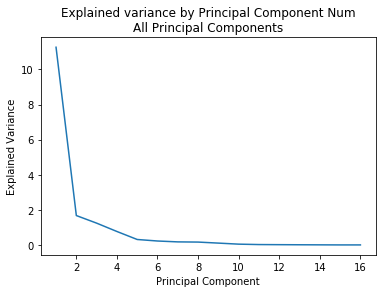

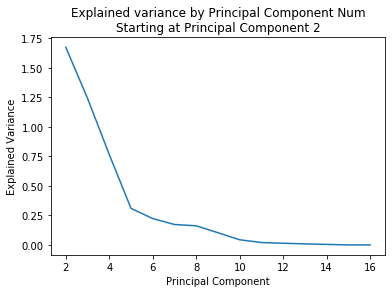

In [10]:
# Plot the explained variance for all principal components.
# Note: If the first value is too large, it may dwarf how the rest look.
# You may consider plotting starting with the 2nd value (python index at 1).

# explained variance
exp_var = pca.explained_variance_
print('explained variance:')
print(exp_var)

# plot for all principal components
plt.plot(range(1,len(exp_var)+1), exp_var)
plt.title('Explained variance by Principal Component Num\nAll Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

# start with principal component 2 since the first value dwarfs how the rest look
plt.plot(range(1+1,len(exp_var)+1), exp_var[1:])
plt.title('Explained variance by Principal Component Num\nStarting at Principal Component 2')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

#### 5. PCR - Linear regression with the principal components.

Formula used:
total_UPDRS ~ pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9


                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     71.84
Date:                Wed, 31 Jul 2019   Prob (F-statistic):          2.42e-126
Time:                        16:31:39   Log-Likelihood:                -8029.1
No. Observations:                5875   AIC:                         1.608e+04
Df Residuals:                    5865   BIC:                         1.614e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

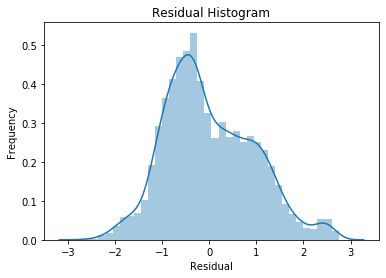

In [11]:
# Perform linear regression with the first n columns.
n = 9 # choice for n explained below
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

# print formula used
print('Formula used:')
print(formula_final)
print('\n')

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

Summary of your results!

<b>Summary</b>

16 features were selected from the Parkinsons Telemonitoring Data. 'total_UPDRS' was the target. 
Features and target were scaled (standardized). 
Principal components were created and the explained variance was plotted.
Linear regression was performed with a subset of the principal components.

<b>1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).</b>

Before: there are 16 principal components from 16 features. <br>After: the number of principal components chosen was 9.<br>

When all 16 principal components were used, the last 7 (pc10-pc16) are not needed for a significant fit (all with p>0.05). The $R^2_{adj}$ for this full model was 0.098. Excluding these components and choosing pc1-pc9, the $R^2_{adj}$ remained 0.098, indicating essentially no loss in explanatory power.

Consistently, the explained variance plot flattens at/after around pc9, and the variance explained by the last 7 components were relatively small. 

<b>2. Interpret the adjusted R-squared.</b>

$R^2$ is the fraction of the variance of the original data explained by the model. A model that perfectly explains the data has $R^2 = 1$. A model which does not explain the data at all has $R^2 = 0$. However, $R^2$ is generally non-decreasing when model paremeters are added, and a model with more terms may appear to have a better fit simply because it has more terms.

$R^2_{adj}$ adjusts for the number of model parameters. $R^2_{adj}$ increases only if the new feature improves the model more than would be expected by chance. It decreases when a feature improves the model by less than expected by chance. 

Here, $R^2_{adj}$ was assessed as a function of n, the number of principal components.

$R^2_{adj}$ increased when n was increased from 1 to 9. When n = 9, $R^2_{adj}$ = 0.098.
$R^2_{adj}$ remained 0.098 when n was increased from 9 to 16.

Here, $R^2_{adj}$ of 0.098 indicates that the model only explains ~10% of the variance of the original data. Because of this large amount of unexplained variability, predictions will be imprecise. Nevertheless, significant feature coefficients still indicate a relationship between the features and the target variable.